# COMSW 4995 AML Final Project

## Name: Omer Mustel
## UNI: om2349
## Nov 27, 2022

In [210]:
# !/usr/local/Cellar/ipython/8.5.0/libexec/bin/python3.10 -m pip uninstall kaggle
# !kaggle competitions download -c sf-crime
# !/usr/local/Cellar/ipython/8.5.0/libexec/bin/python3.10 -m pip install seaborn
# !/usr/local/Cellar/ipython/8.5.0/libexec/bin/python3.10 -m pip install matplotlib
# !/usr/local/Cellar/ipython/8.5.0/libexec/bin/python3.10 -m pip install sklearn
# !/usr/local/Cellar/ipython/8.5.0/libexec/bin/python3.10 -m pip install warnings

##### NOTES
### group by X or group by Y or group by X,Y
## get top 5-10 highedt count as location label for visualization

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import brier_score_loss
import pandas as pd
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
from shapely.geometry import Point
import time
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import datetime as dt
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay
import warnings
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import auc, precision_recall_curve, average_precision_score

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
pd.options.mode.chained_assignment = None


In [126]:
# df_test = pd.read_csv('sf-crime/test.csv')
df = pd.read_csv('sf-crime/train.csv')
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


## 1. Data Visualization

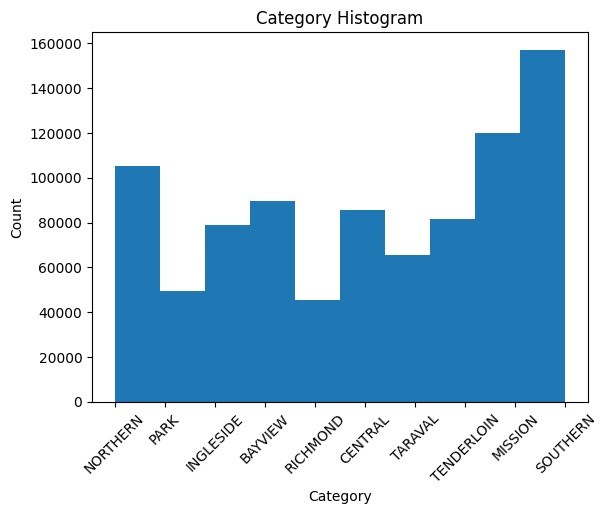

In [119]:
df.head()
plt.title("Category Histogram")
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.hist(df['PdDistrict'])
plt.show()

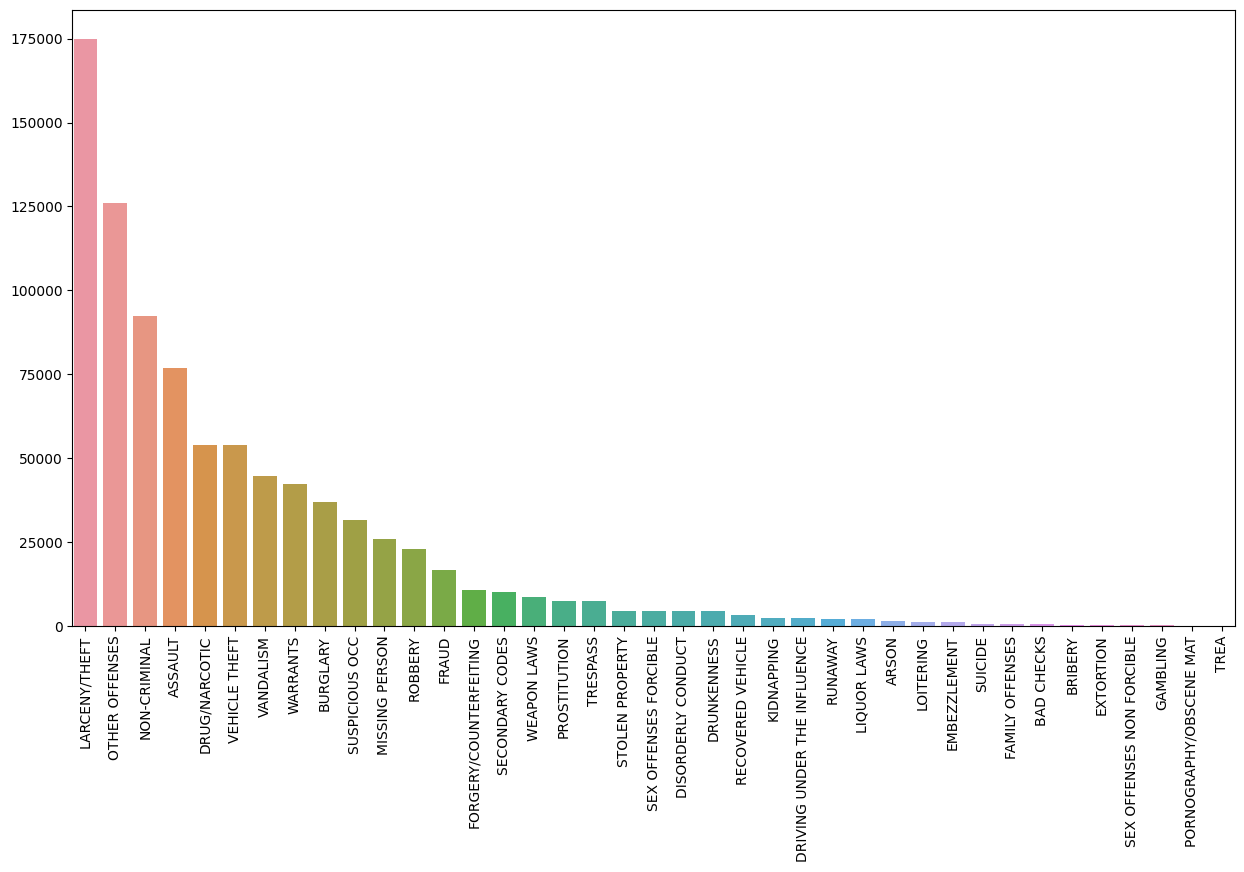

In [3]:
df.head()
from collections import Counter
most_common_crimes = Counter(df["Category"]).most_common()
crime = [i[0] for i in most_common_crimes]
count = [i[1] for i in most_common_crimes]
plt.figure(figsize=(15,8))
ax = sns.barplot(x=crime,y=count)
ax.tick_params(axis ='x',rotation=90)
ax.relim()
ax.margins(x=0.001) 

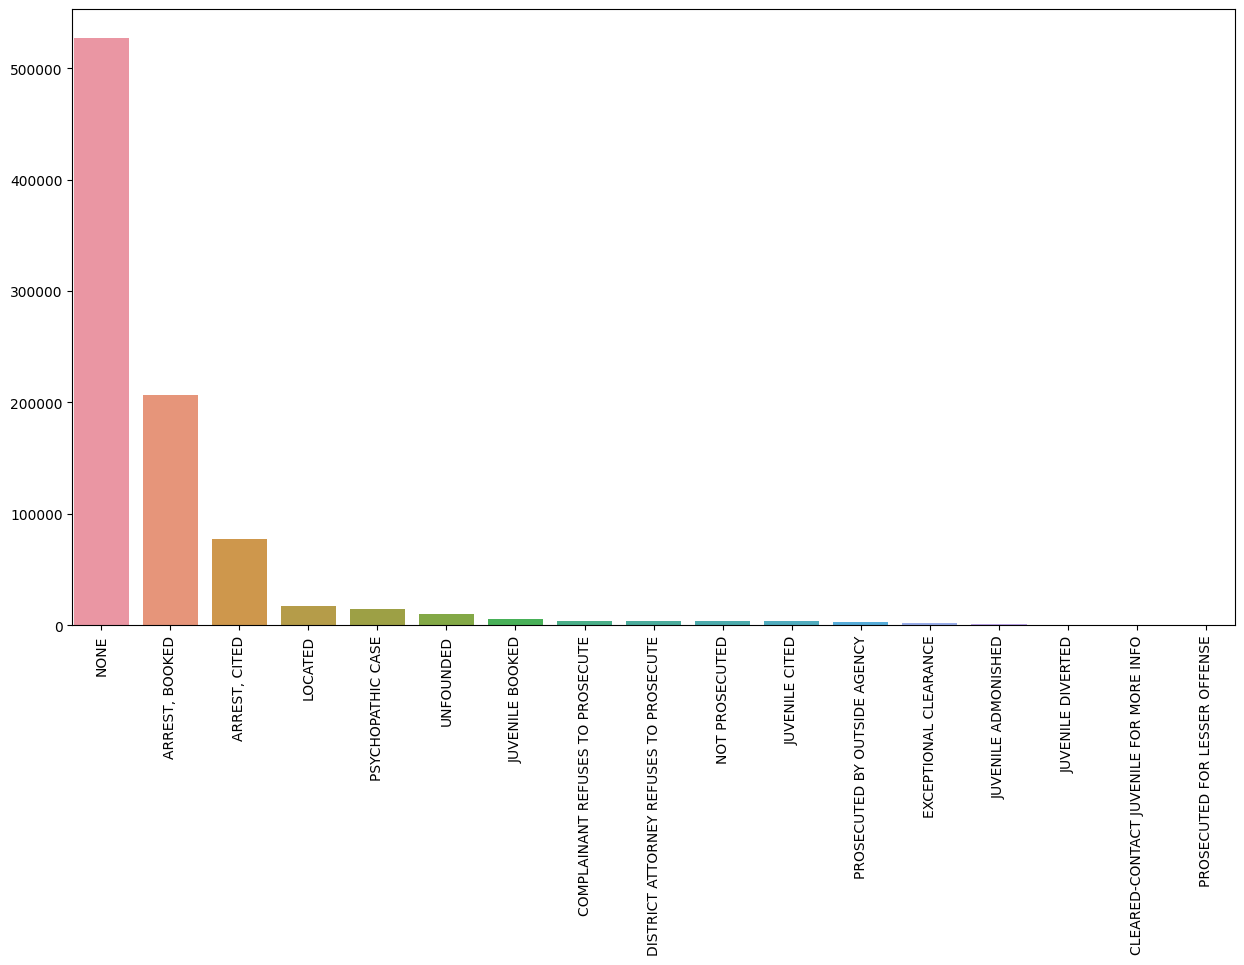

In [4]:
resolutions = Counter(df["Resolution"]).most_common()
resolution = [i[0] for i in resolutions]
res_count = [i[1] for i in resolutions]
plt.figure(figsize=(15,8))
ax1 = sns.barplot(x=resolution,y=res_count)
ax1.tick_params(axis ='x',rotation=90)
ax1.relim()
ax1.margins(x=0.001)

In [122]:
resolutions

[('NONE', 526790),
 ('ARREST, BOOKED', 206403),
 ('ARREST, CITED', 77004),
 ('LOCATED', 17101),
 ('PSYCHOPATHIC CASE', 14534),
 ('UNFOUNDED', 9585),
 ('JUVENILE BOOKED', 5564),
 ('COMPLAINANT REFUSES TO PROSECUTE', 3976),
 ('DISTRICT ATTORNEY REFUSES TO PROSECUTE', 3934),
 ('NOT PROSECUTED', 3714),
 ('JUVENILE CITED', 3332),
 ('PROSECUTED BY OUTSIDE AGENCY', 2504),
 ('EXCEPTIONAL CLEARANCE', 1530),
 ('JUVENILE ADMONISHED', 1455),
 ('JUVENILE DIVERTED', 355),
 ('CLEARED-CONTACT JUVENILE FOR MORE INFO', 217),
 ('PROSECUTED FOR LESSER OFFENSE', 51)]

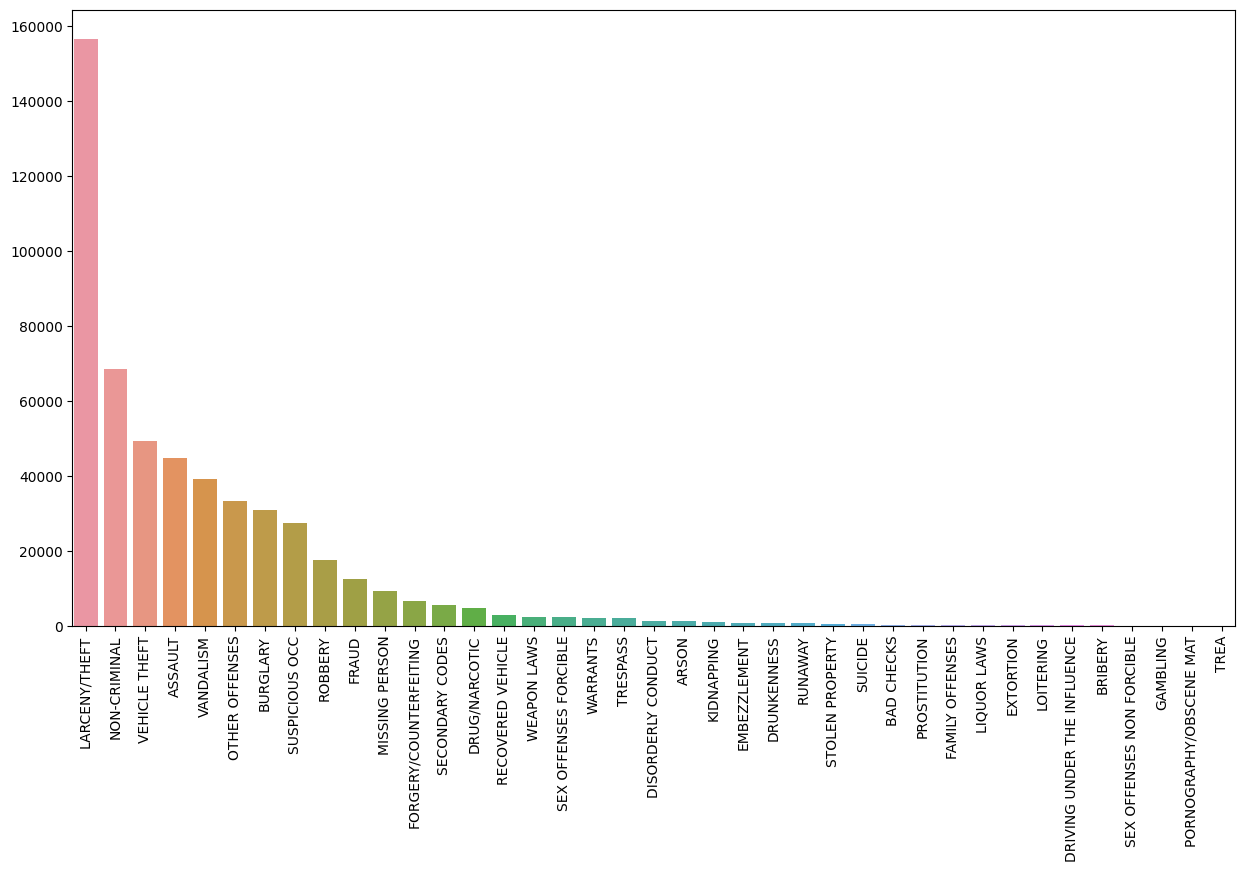

In [5]:
nones = df['Resolution'] == 'NONE'
most_nones = df[nones]
cr = Counter(most_nones["Category"]).most_common()
res = [i[0] for i in cr]
cnt = [i[1] for i in cr]
plt.figure(figsize=(15,8))
ax1 = sns.barplot(x=res,y=cnt)
ax1.tick_params(axis ='x',rotation=90)
ax1.relim()
ax1.margins(x=0.001)

In [100]:
lat_long_tuples = Counter([(i[0], i[1]) for i in zip(df['X'], df['Y'])]).most_common()


In [13]:
### use wget for the zipfile
# !wget https://www2.census.gov/geo/tiger/TIGER2017//ROADS/tl_2017_06075_roads.zip


In [126]:

# with zipfile.ZipFile('tl_2017_06075_roads.zip', 'r') as zip_ref:
#     zip_ref.extractall('shapefiles')

In [127]:
# geo_df = gpd.read_file('shapefiles/tl_2017_06075_roads.shp')

In [83]:
# # Initialize our plot
# fig, ax = plt.subplots(figsize=(10,10))
# # Plot our SF GeoDataFrame
# geo_df.plot(ax=ax, alpha = .2)
# # Turn off axis
# ax.set_axis_off()
# # Save image
# fig.tight_layout()
# plt.savefig('shapefile_plot.png');

In [84]:
# CREDIT: https://medium.com/@sindhu.ravikumar/visualizing-spatial-data-with-geopandas-and-contextily-10e9b8e71e49
# geo_df.crs # output: {'init': 'epsg:4269'}
# geo_df = geo_df.to_crs(epsg=3857) # Initialize our plot


# fig, ax = plt.subplots(figsize=(10,10)) # Plot our SF GeoDataFrame
# geo_df.plot(ax=ax, alpha = .1) # Add in a background using contextily
# ctx.add_basemap(ax) # Turn off axis
# ax.set_axis_off()
# fig.tight_layout()
# plt.savefig('contextily_plot.png');


In [3]:
# Clean our data to get the information we want
# df_sf = df[['Category', 'Resolution', 'X', 'Y']]
# mask = df_sf['Category'] == 'ASSAULT'
# df_sf = df_sf[mask] 
# df_sf = df_sf[df_sf['Resolution'] == 'ARREST, CITED']
# # df_sf = df_sf[df_sf['Resolution'] == 'ARREST, CITED']
# df_sf = df_sf.sort_values(by='X')[3:]
# df_sf

,Category,Resolution,X,Y
822977,ASSAULT,"ARREST, CITED",-122.509381,37.760270
777170,ASSAULT,"ARREST, CITED",-122.508619,37.760360
286577,ASSAULT,"ARREST, CITED",-122.508190,37.754768
623107,ASSAULT,"ARREST, CITED",-122.507994,37.752795
633865,ASSAULT,"ARREST, CITED",-122.507934,37.758465
...,...,...,...,...
814764,ASSAULT,"ARREST, CITED",-122.364937,37.810204
835739,ASSAULT,"ARREST, CITED",-122.364937,37.810204
778591,ASSAULT,"ARREST, CITED",-122.364937,37.810204
830834,ASSAULT,"ARREST, CITED",-122.364937,37.810204


In [128]:
# df_sf['geometry'] = df_sf.apply(lambda x: Point(float(x.X), float(x.Y)), axis=1)
# # Convert Pandas DataFrame to a GeoDataFrame
# crimes_geo_df = gpd.GeoDataFrame(df_sf, geometry='geometry')
# # Initialize crs to 4326 because that's the format of our geomtry
# crimes_geo_df.crs = "EPSG:4326"
# # Change the crs to match our SF GeoDataFrame
# crimes_geo_df = crimes_geo_df.to_crs(epsg = 3857)

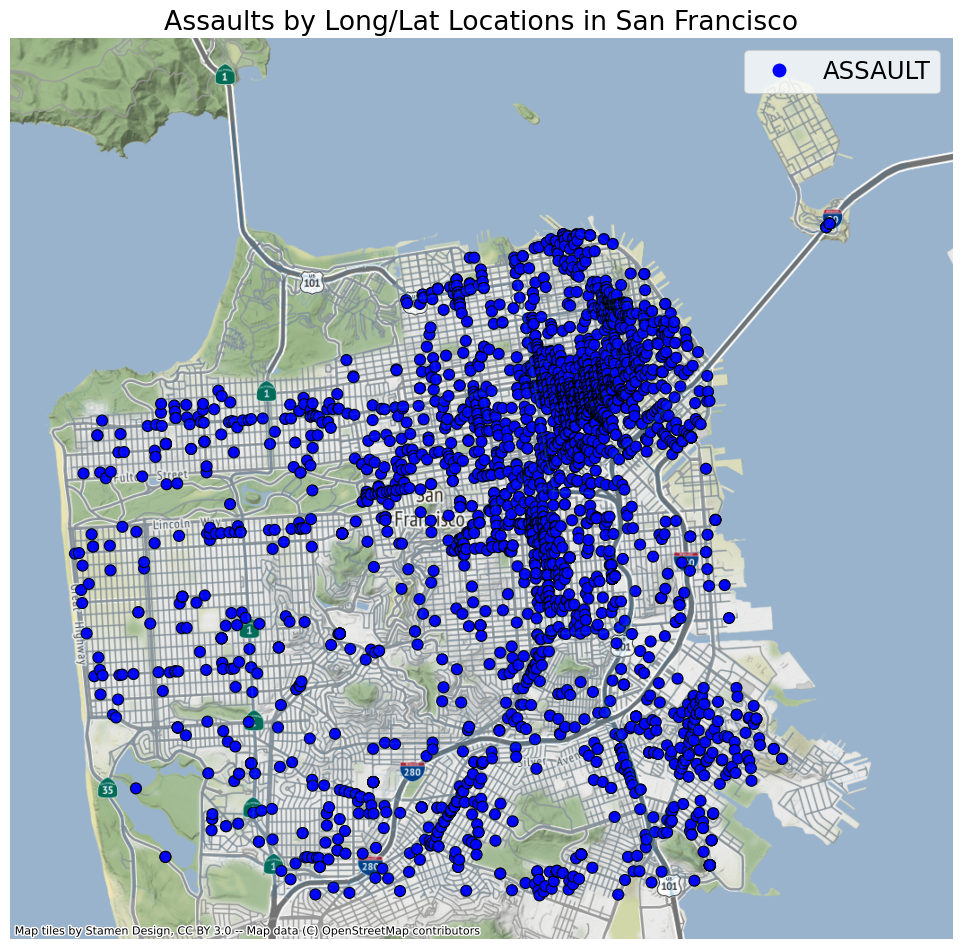

In [132]:
# # Change context for readability
# sns.set_context("paper", font_scale=2)
# # Initialize our plot
# fig, ax = plt.subplots(figsize=(10,10))
# # Plot our SF GeoDataFrame
# geo_df.plot(ax=ax, alpha = .1)
# # Plot our locations
# crimes_geo_df.plot(ax=ax, column = 'Category', cmap = 'brg', marker = '.', markersize=250, edgecolor = 'black', legend = True)
# # Add in a background using contextily
# ctx.add_basemap(ax)
# # Turn off axis
# ax.set_axis_off()
# fig.tight_layout()
# plt.title("Assaults by Long/Lat Locations in San Francisco")
# plt.savefig('Crime_By_Cat.png');

# Some Analysis & data proccessong
### Data fields
#### Dates: timestamp of the crime incident
#### Category: category of the crime incident
#### Descript: detailed description of the crime incident
#### DayOfWeek: the day of the week
#### PdDistrict: name of the Police Department District
#### Resolution: how the crime incident was resolved
#### Address: the approximate street address of the crime incident
#### X: Longitude
#### Y: Latitude

In [127]:
df.dtypes

Dates          object
Category       object
Descript       object
DayOfWeek      object
PdDistrict     object
Resolution     object
Address        object
X             float64
Y             float64
dtype: object

In [128]:
df.head()

col_name = df.columns
col_vals, na_cols = [], []
row_shape = df.shape[0]
for col in col_name:
    _sum = df[col].isna().sum()
    if not _sum == 0:
        na_cols.append(col)
        col_vals.append(_sum/row_shape)
        
if not na_cols:
    print("there are no missing values; no need to drop values")
else:
    print("there are some missing values... lets do soemthing about it")

there are no missing values; no need to drop values


In [129]:
df.duplicated().sum() ## remove duplicates

2323

In [130]:
df.drop_duplicates(keep="first", inplace=True)

In [131]:
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


# get outliers 

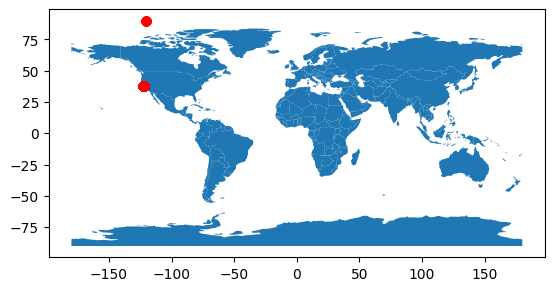

In [7]:
# from geopandas import GeoDataFrame
geometry = [Point(xy) for xy in zip(df['X'], df['Y'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(), marker='o', color='red')
plt.show()

In [132]:
df = df.drop(df[(df.X > -122) | (df.X < -123) | (df.Y > 38) | (df.Y < 37)].index)
## get rid of outliers and misleading rows

In [133]:
df.duplicated().sum() ##get and remove dups

0

In [134]:
df['Dates'] = pd.to_datetime(df['Dates'])

df['year'] = df['Dates'].dt.year
df['month'] = df['Dates'].dt.month
df['day_of_month'] = df['Dates'].dt.day
df['day_of_week'] = df['Dates'].dt.day_of_week
df['hour'] = df['Dates'].dt.hour
df.drop(['Dates', 'DayOfWeek'], axis = 1, inplace = True)
df.dtypes

Category         object
Descript         object
PdDistrict       object
Resolution       object
Address          object
X               float64
Y               float64
year              int64
month             int64
day_of_month      int64
day_of_week       int64
hour              int64
dtype: object

In [256]:
# holidays = calendar().holidays(start=df["Dates"].min(), end=df["Dates"].max())
# df["Holiday"] = dates.astype("datetime64").isin(holidays)

/var/folders/8l/6hfb20m92ls41dqb85p_2ptr0000gn/T/ipykernel_86728/2458064152.py:2: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  df["Holiday"] = dates.astype("datetime64").isin(holidays)


In [257]:
# df["Weekend"] = df["DayOfWeek"].map(lambda x : x == "Saturday" or x == "Sunday")

In [216]:
# le = LabelEncoder()
# df["Category_Label"] = le.fit_transform(df["Category"])
# df["DayOfWeek_Label"] = le.fit_transform(df["DayOfWeek"])
# df["PdDistrict_Label"] = le.fit_transform(df["PdDistrict"])

# df = df.drop(columns=["Category", "DayOfWeek", "PdDistrict"])

In [135]:
# df = df.drop(columns=["Dates", "Address", "Resolution", "Descript"])
df.dropna(inplace=True)

In [136]:
df.head()

,Category,Descript,PdDistrict,Resolution,Address,X,Y,year,month,day_of_month,day_of_week,hour
0,WARRANTS,WARRANT ARREST,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,2,23
1,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,2,23
2,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,2,23
3,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,2,23
4,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,2,23


In [137]:
df.columns = [item.lower() for item in df.columns]
df.rename(columns={'dayofweek': 'day_of_week'}, inplace=True)
df

,category,descript,pddistrict,resolution,address,x,y,year,month,day_of_month,day_of_week,hour
0,WARRANTS,WARRANT ARREST,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,2,23
1,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,2,23
2,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,2,23
3,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,2,23
4,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,2,23
...,...,...,...,...,...,...,...,...,...,...,...,...
878044,ROBBERY,ROBBERY ON THE STREET WITH A GUN,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056,2003,1,6,0,0
878045,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948,2003,1,6,0,0
878046,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266,2003,1,6,0,0
878047,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607,2003,1,6,0,0


In [35]:
pd.crosstab(df['day_of_week'], df['category'])

category,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
day_of_week,,,,,,,,,,,,,,,,,,,,,
0,228,10549,66,41,5239,607,263,7812,512,222,...,23,636,75,4445,1,1079,5915,7401,5804,1182
1,235,10268,76,37,5356,657,251,8463,461,156,...,23,712,66,4512,1,1113,5844,7260,6410,1176
2,200,10549,71,40,5430,657,221,9259,541,165,...,22,699,66,4849,0,1120,5904,7391,7008,1251
3,199,10236,66,39,5336,642,282,8447,496,165,...,15,678,89,4504,1,1046,5968,7447,6361,1281
4,220,11152,62,49,6301,540,352,7415,621,211,...,28,647,72,4920,1,1062,7071,8596,5921,1302
5,219,11987,45,42,4732,624,457,6385,833,137,...,21,581,73,4154,2,982,7301,8106,5355,1231
6,211,12070,20,41,4205,584,442,6138,813,108,...,16,583,67,4008,0,915,6577,7496,5278,1127


In [138]:
top200Des = df['descript'].value_counts()[:200].index
df['descript'] = df['descript'].apply(lambda x :x if x in top200Des else 'other' )
x = df.drop(['category', 'address'], axis = 1)
y = df['category']
x

,descript,pddistrict,resolution,x,y,year,month,day_of_month,day_of_week,hour
0,WARRANT ARREST,NORTHERN,"ARREST, BOOKED",-122.425892,37.774599,2015,5,13,2,23
1,TRAFFIC VIOLATION ARREST,NORTHERN,"ARREST, BOOKED",-122.425892,37.774599,2015,5,13,2,23
2,TRAFFIC VIOLATION ARREST,NORTHERN,"ARREST, BOOKED",-122.424363,37.800414,2015,5,13,2,23
3,GRAND THEFT FROM LOCKED AUTO,NORTHERN,NONE,-122.426995,37.800873,2015,5,13,2,23
4,GRAND THEFT FROM LOCKED AUTO,PARK,NONE,-122.438738,37.771541,2015,5,13,2,23
...,...,...,...,...,...,...,...,...,...,...
878044,ROBBERY ON THE STREET WITH A GUN,TARAVAL,NONE,-122.459033,37.714056,2003,1,6,0,0
878045,GRAND THEFT FROM LOCKED AUTO,INGLESIDE,NONE,-122.447364,37.731948,2003,1,6,0,0
878046,GRAND THEFT FROM LOCKED AUTO,SOUTHERN,NONE,-122.403390,37.780266,2003,1,6,0,0
878047,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",SOUTHERN,NONE,-122.390531,37.780607,2003,1,6,0,0


In [139]:
le = LabelEncoder()
y = le.fit_transform(y)
x['descript'] = le.fit_transform(x['descript'])
x['pddistrict'] = le.fit_transform(x['pddistrict'])
x['resolution'] = le.fit_transform(x['resolution'])



## Assesment; what do we want to achieve?

#### Perhaps special days of the year when more crime is reported? E.g., hollydays?
#### Where is it most likely to occur?
#### When during the day what crime is most likely happens?
#### Given some crime, location, and time, what is the potential resolution
#### ...


In [146]:
# TODO: feature improtance and most popular categories in each cols to see relevancy

## 2. Splitting Data

In [246]:
X_dev, X_test, y_dev, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)


In [247]:
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, stratify=y_dev, test_size=0.2, random_state=42)


In [104]:
# mms = MinMaxScaler()
# X_train = mms.fit_transform(X_train)
# X_test = mms.transform(X_test)

In [105]:
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

# 3. Models


## Logistic Regression


In [106]:
logistic_regression_model = LogisticRegression()

In [107]:

logistic_regression_model.fit(X_train, y_train)

/usr/local/Cellar/ipython/8.5.0/libexec/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [108]:
lr_train_loss = log_loss(y_train, logistic_regression_model.predict_proba(X_train))
lr_val_loss = log_loss(y_val, logistic_regression_model.predict_proba(X_val))

lr_train_acc = logistic_regression_model.score(X_train, y_train)
lr_val_acc = logistic_regression_model.score(X_val, y_val)

/usr/local/Cellar/ipython/8.5.0/libexec/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/Cellar/ipython/8.5.0/libexec/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [109]:
print(f"lr_train_loss: {lr_train_loss}")
print(f"lr_val_loss: {lr_val_loss}")
print(f"lr_train_acc: {lr_train_acc}")
print(f"lr_val_acc: {lr_val_acc}")


lr_train_loss: 2.11145937659466
lr_val_loss: 34.527436525710506
lr_train_acc: 0.38562616318803183
lr_val_acc: 0.0003283228412773186


In [111]:
# hyperaparms
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

model = LogisticRegression()
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
grid_result = grid_search.fit(X_train, y_train)


In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

## KNN

In [112]:
knn_model = KNeighborsClassifier(n_neighbors=9)

In [113]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [115]:
knn_train_loss = log_loss(y_train, knn_model.predict_proba(X_train))
knn_val_loss = log_loss(y_val, knn_model.predict_proba(X_val))

knn_train_acc = knn_model.score(X_train, y_train)
knn_val_acc = knn_model.score(X_val, y_val)

/usr/local/Cellar/ipython/8.5.0/libexec/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/Cellar/ipython/8.5.0/libexec/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [116]:
print(f"knn_train_loss: {knn_train_loss}")
print(f"knn_val_loss: {knn_val_loss}")
print(f"knn_train_acc: {knn_train_acc}")
print(f"knn_val_acc: {knn_val_acc}")

knn_train_loss: 1.0978535138969006
knn_val_loss: 20.53536401093991
knn_train_acc: 0.5484002205484805
knn_val_acc: 0.1318002084136297


## Random Forest

In [350]:
rfc = RandomForestClassifier(random_state = 42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)



In [351]:
train_acc = rfc.score(X_train, y_train)
train_loss = log_loss(y_train, rfc.predict_proba(X_train))
val_acc = rfc.score(X_val, y_val)
val_loss = log_loss(y_val, rfc.predict_proba(X_val))

print(f"train_acc: {train_acc}")
print(f"val_acc: {val_acc}")
print(f"val_acc: {val_acc}")
print(f"val_loss: {val_loss}")

/usr/local/Cellar/ipython/8.5.0/libexec/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/Cellar/ipython/8.5.0/libexec/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


train_acc: 0.9984351050371061
val_acc: 0.13047977959544915
val_acc: 0.13047977959544915
val_loss: 4.260976180619785


In [ ]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
plt.title("Confusion matrix random over sampling")
plt.show()


In [175]:
random_forest = make_pipeline(preprocess, RandomForestClassifier(random_state=40))
random_forest.fit(X_dev, y_dev)
test_score = random_forest.score(X_test, y_test)
print(f'Accuracy for test set: {test_score}')


Accuracy for test set: 0.9573750085649682


In [177]:

X_dev_trans = random_forest[:-1].fit_transform(X_dev)
rf_y_pred_dev = random_forest['randomforestclassifier'].predict(X_dev_trans)
print(f"Model Accuracy: {accuracy_score(rf_y_pred_dev, y_dev)}")

estimator = random_forest['randomforestclassifier'].estimators_
impurity_count = 0
for rf in estimator:
    children_left = rf.tree_.children_left
    children_right = rf.tree_.children_right
    tree_depth = [0] * rf.tree_.node_count
    leaves = [False] * rf.tree_.node_count
    queue = [(children_left[0], 0)] 

    while queue:
        node, level = queue.pop(0)
        tree_depth[node] = level

        if children_left[node] != children_right[node]:
            queue.insert(0,(children_left[node], level + 1))
            queue.insert(0,(children_right[node], level + 1))
        else:
            if rf.tree_.impurity[node] > 0:
                impurity_count -= ~1
            leaves[node] = True
print(f"# of impurities found: {impurity_count}")

Model Accuracy: 0.9980785894048337
# of impurities found: 105398


# RF with GridSearchCV & Feature Importance

In [171]:
preprocess = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore"), ['pddistrict', 'descript', 'resolution']), remainder="passthrough")


In [174]:

max_depth = [5,10,15] ## best ranges foudn after many attempts
n_estimators = [50,80,110]

rf_pipe = make_pipeline(preprocess,  
                        GridSearchCV(RandomForestClassifier(), 
                        param_grid = {'max_depth': max_depth, 
                                         'n_estimators': n_estimators}))
rf_pipe.fit(X_train, y_train)

/usr/local/Cellar/ipython/8.5.0/libexec/lib/python3.10/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['pddistrict', 'descript',
                                                   'resolution'])])),
                ('gridsearchcv',
                 GridSearchCV(estimator=RandomForestClassifier(),
                              param_grid={'max_depth': [5, 10, 15],
                                          'n_estimators': [50, 80, 110]}))])

In [178]:
rf = rf_pipe.named_steps['gridsearchcv']
print(f"Best values for parameters: {rf.best_params_}")
print(f"Best score: {rf.best_score_}")

Best values for parameters: {'max_depth': 15, 'n_estimators': 110}
Best score: 0.737199360515046


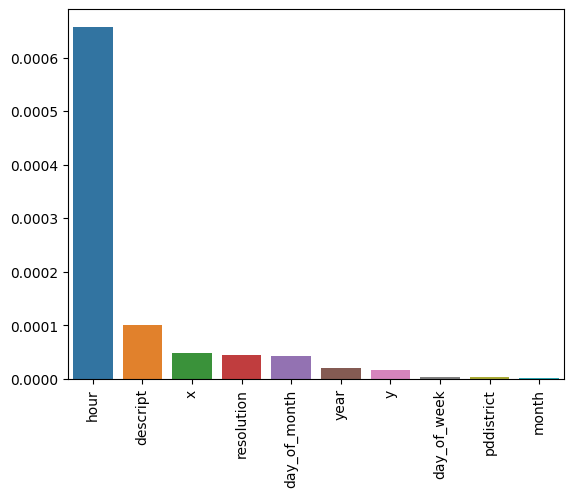

In [180]:
ohe_feature_names = preprocess.named_transformers_['onehotencoder'].feature_names_in_.tolist()
rf = rf_pipe['gridsearchcv']
feat_imps = list(zip(x.columns, rf.best_estimator_.feature_importances_))
feats, imps = zip(*(sorted(list(filter(lambda x : x[1] != 0, feat_imps)),key = lambda x : x[1], reverse = True)))
ax = sns.barplot(x=list(feats),y=list(imps))
ax.tick_params(axis ='x',rotation=90)

In [254]:
y_pred =  rf_pipe.named_steps['gridsearchcv'].predict(preprocess.transform(X_val))
accuracy_score(y_pred, y_val)

0.7197835924228798

In [255]:
rf_pipe.fit(X_dev, y_dev)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['pddistrict', 'descript',
                                                   'resolution'])])),
                ('gridsearchcv',
                 GridSearchCV(estimator=RandomForestClassifier(),
                              param_grid={'max_depth': [5, 10, 15],
                                          'n_estimators': [50, 80, 110]}))])

In [256]:
y_pred =  rf_pipe.named_steps['gridsearchcv'].predict(preprocess.transform(X_test))
accuracy_score(y_pred, y_test)

0.7286789393143458

# PCA -----

In [226]:
### RandomForest RESULTS

pca_rf = make_pipeline(
                        OrdinalEncoder(), 
                        PCA(n_components=6),
                        RandomForestClassifier(
                            n_estimators=32,
                            max_depth=5,
                            random_state=42
                            )
                      )

pca_rf.fit(X_dev, y_dev)

Best values for parameters: {'max_depth': 15, 'n_estimators': 110}
Best score: 0.737199360515046


In [263]:
y_pred_pca = pca_rf['randomforestclassifier'].predict(X_test.iloc[:, :6])
accuracy_score(y_pred_pca, y_test)

/usr/local/Cellar/ipython/8.5.0/libexec/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.14382865495740355

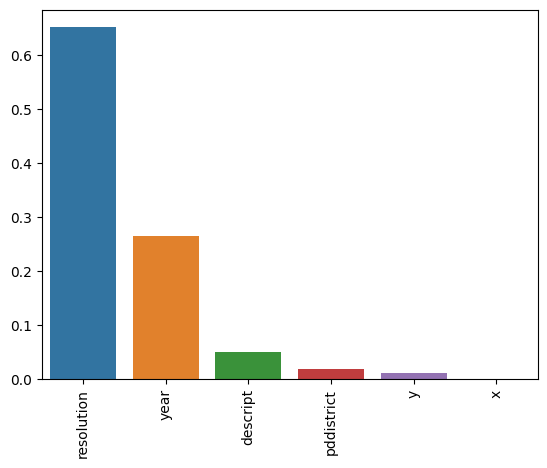

In [235]:
rf = pca_rf[-1]
ohe_feature_names = preprocess.named_transformers_['onehotencoder'].feature_names_in_.tolist()
feat_imps = list(zip(x.columns, rf.feature_importances_))
feats, imps = zip(*(sorted(list(filter(lambda x : x[1] != 0, feat_imps)),key = lambda x : x[1], reverse = True)))
ax = sns.barplot(x=list(feats),y=list(imps))
ax.tick_params(axis ='x',rotation=90)


## XGBoost

In [142]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [143]:
accuracy_score(y_pred, y_test)

0.9584028047415664

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

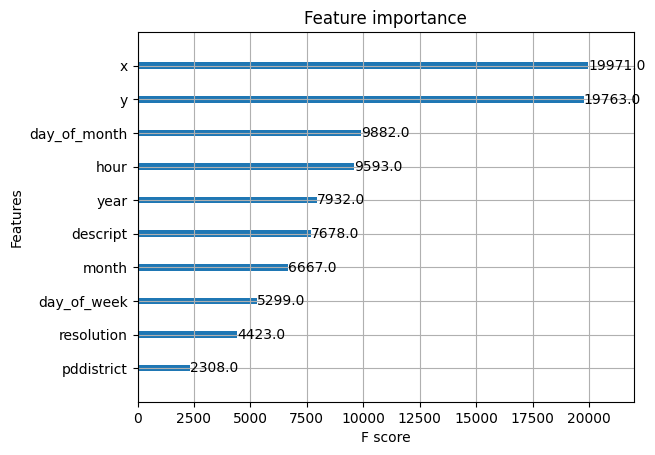

In [144]:
xgb.plot_importance(model)

Location (coordinates) has the highest feature importance. THen day of the month (weekends mainly from data exploration).

In [147]:
preprocess = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore"), ['pddistrict', 'descript', 'resolution']), remainder="passthrough")

xgb_pipe = make_pipeline(preprocess,
                        XGBClassifier())

xgb_pipe.fit(X_dev, y_dev)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['pddistrict', 'descript',
                                                   'resolution'])])),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=...
                               feature_types=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_threshold=64, max_cat_to_onehot=4,
                               max_delta_step=0, max_depth=6, max_leaves=0,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto', ...))])

In [ ]:
# # xgb = xgb_pipe.named_steps['xgbclassifier']
# y_pred_xgb_pipe = xgb_pipe.predict(X_test)
# acc_xgb_pipe = accuracy_score(xgb_y_pred_test, y_test)
# print(f"Accuracy for pipe: {acc_xgb_pipe}")

In [148]:
xgb_y_pred_test = xgb_pipe.predict(X_test)
print(f"Performace of the test set: {accuracy_score(xgb_y_pred_test, y_test)}")

Performace of the test set: 0.9580088162072037


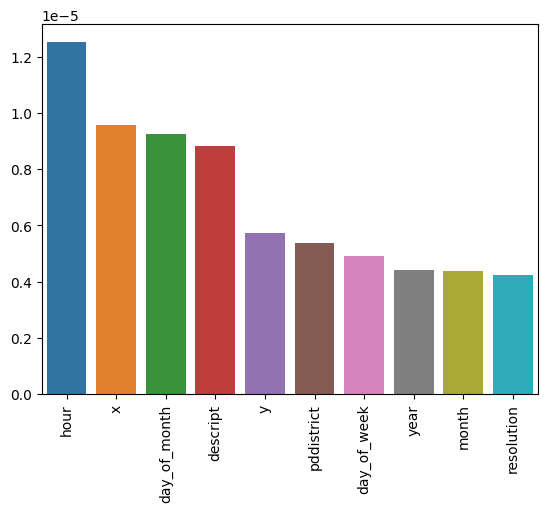

In [152]:
ohe_feature_names = preprocess.named_transformers_['onehotencoder'].feature_names_in_.tolist()
xgb = xgb_pipe['xgbclassifier']
feat_imps = list(zip(x.columns, xgb.feature_importances_))
feats, imps = zip(*(sorted(list(filter(lambda x : x[1] != 0, feat_imps)),key = lambda x : x[1], reverse = True)))
ax = sns.barplot(x=list(feats),y=list(imps))
ax.tick_params(axis ='x',rotation=90)

Focusing on the labels ['pddistrict', 'descript', 'resolution'], we can see that the time of the day is the most important feature

# XGBoost GridSearchCV

In [214]:
preprocess = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore"), ['pddistrict', 'descript', 'resolution']), remainder="passthrough")

xgb_pipe = make_pipeline(preprocess,
                        GridSearchCV(XGBClassifier(random_state=42, verbosity = 0), 
                        param_grid = {
                                       'learning_rate': np.logspace(-3,0,4),
                                       'max_depth': [3,6,9], 
                                       'n_estimators': [20,30,50]
                                     },
                           cv = 3))


xgb_pipe.fit(X_dev, y_dev)

In [237]:

xgb = xgb_pipe.named_steps['gridsearchcv']
print(f"Best values for parameters: {xgb.best_params_}")
print(f"Best Accuracy: {xgb.best_score_}")
log_loss(y_test, xgb.predict_proba(X_test))

# AUC With Random Forest and XGBoost

In [218]:
crs_val_tree = cross_validate(DecisionTreeClassifier(max_depth=15, random_state=42), ###
                       X_train,y_train,cv=3,
                       scoring=['roc_auc','average_precision'],
                       return_estimator= True)

/usr/local/Cellar/ipython/8.5.0/libexec/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/Cellar/ipython/8.5.0/libexec/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/Cellar/ipython/8.5.0/libexec/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 106, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/Cellar/ipython/8.5.0/libexec/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 352, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
/usr/local/Cellar/ipython/8.5.0/libexec/lib/python3.10/site-packages/sklearn/model_selection/_v

In [212]:
crs_val_xgb = cross_validate(XGBClassifier(max_depth=10, random_state=42),
                       X_train,y_train,cv=3,
                       scoring=['roc_auc','average_precision'],
                       return_estimator= True)

/usr/local/Cellar/ipython/8.5.0/libexec/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/Cellar/ipython/8.5.0/libexec/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/Cellar/ipython/8.5.0/libexec/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 106, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/Cellar/ipython/8.5.0/libexec/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 352, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
/usr/local/Cellar/ipython/8.5.0/libexec/lib/python3.10/site-packages/sklearn/model_selection/_v

In [223]:
best_index_xgb = np.argmax(crs_val_xgb['test_roc_auc'])
pred_proba_xgb = crs_val['estimator'][best_index_xgb].predict_proba(X_test)

best_index_rf = np.argmax(crs_val_tree['test_roc_auc'])
pred_proba_rf = crs_val['estimator'][best_index_rf].predict_proba(X_test)


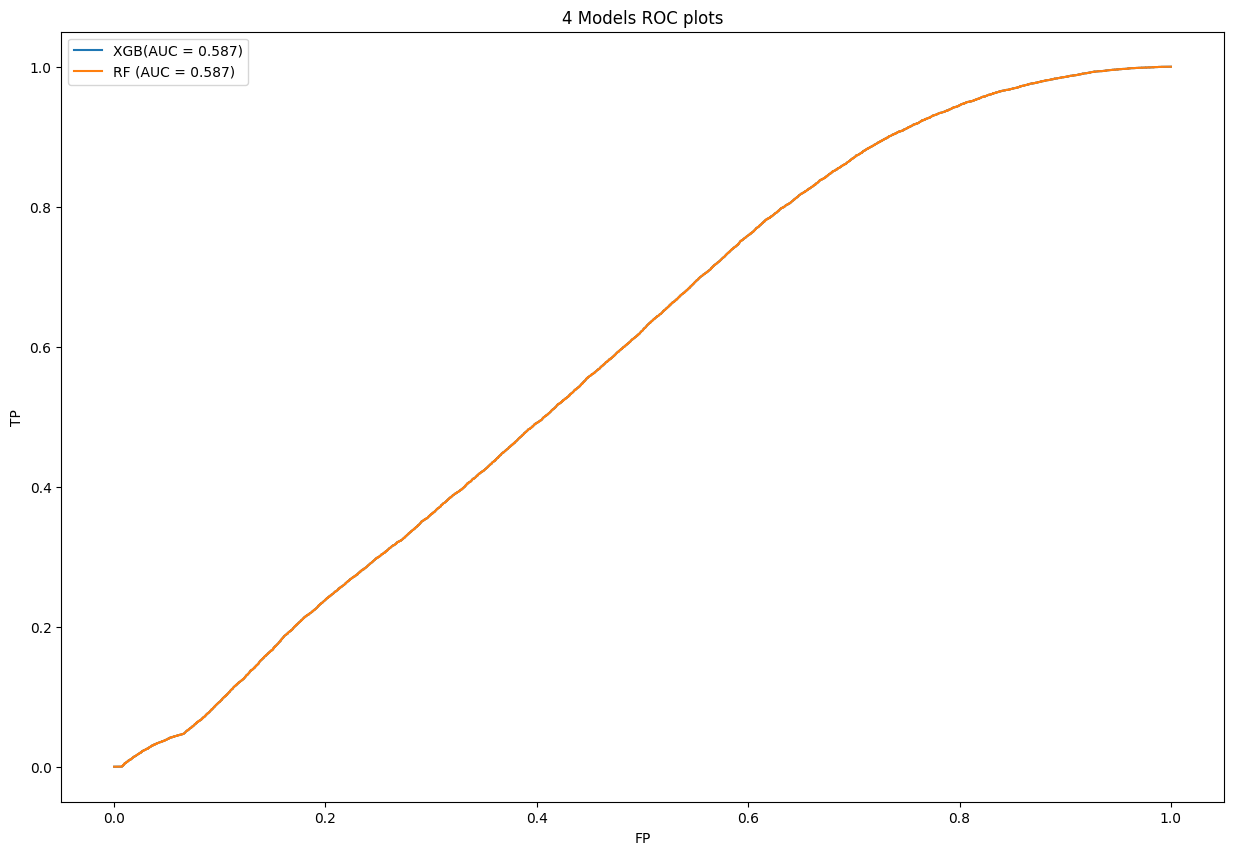

In [224]:
plt.figure(figsize = (15,10))

fpr, tpr, _ = roc_curve(y_test, pred_proba_xgb[:,-1], pos_label=1)
roc_score = auc(fpr, tpr)
plt.plot(fpr, tpr, label="XGB(AUC = %0.3f)" % roc_score)

fpr, tpr, _ = roc_curve(y_test, pred_proba_rf[:,-1], pos_label=1)
roc_score = auc(fpr, tpr)
plt.plot(fpr, tpr, label="RF (AUC = %0.3f)" % roc_score)
plt.title("4 Models ROC plots")
plt.xlabel("FP")
plt.ylabel("TP")
plt.legend()

# Calibration

In [ ]:
prepreprocess = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore"), ['pddistrict']), remainder="passthrough")

pipe_clbr = make_pipeline(preprocess,
                    GridSearchCV(XGBClassifier(random_state=42, verbosity = 0),
                                param_grid = [{'learning_rate': [0.01, 0.05, 0.1], 
                                              'n_estimators': [80, 100, 120],
                                              'max_depth': [4, 5, 6]}],
                                return_train_score = True, 
                                 cv=3))
pipe_clbr.fit(X_dev, y_dev)

In [ ]:

isotonic_clbr = CalibratedClassifierCV(pipe_clbr.named_steps['gridsearchcv'].best_estimator_, 
                                       cv = 'prefit', 
                                       method = 'isotonic')
isotonic_clbr.fit(pipe_clbr.named_steps['columntransformer'].transform(X_test), y_test)


In [ ]:
display = CalibrationDisplay.from_estimator( 
    isotonic_clbr, pipe_clbr.named_steps['columntransformer'].transform(X_val), y_val)


In [ ]:

platt_clbr = CalibratedClassifierCV(pipe_clbr.named_steps['gridsearchcv'].best_estimator_, cv='prefit', method='sigmoid')
platt_clbr.fit(pipe_clbr.named_steps['columntransformer'].transform(X_test), y_test)
display = CalibrationDisplay.from_estimator(
    platt_clbr, pipe_clbr.named_steps['columntransformer'].transform(X_val), 
    y_test)

In [ ]:
y_pred_prob_iso = isotonic_clbr.predict_proba(pipe_clbr.named_steps['columntransformer'].transform(X_test))
brier_iso = brier_score_loss(y_test, y_pred_prob_iso[:,1])
print(f"Brier score for Isotonic Calibration: {brier_iso}")

y_pred_prob_platt = platt_clbr.predict_proba(pipe_clbr.named_steps['columntransformer'].transform(X_test))
brier_platt = brier_score_loss(y_test, y_pred_prob_platt[:,1])
print(f"Brier score for platt Scaling Calibration: {brier_platt}")

# Handling XGBoost and the data differently (failed attempt)

In [59]:
df_xgb = pd.read_csv('sf-crime/train.csv')
df_xgb.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [61]:
### clean the dataset
category = df_xgb[["Category"]].drop_duplicates()
category["Category_id"] = list(range(category.shape[0]))
print("Category shape: ", category.shape[0])

week = df_xgb[["DayOfWeek"]].drop_duplicates()
week["DayOfWeek_id"] = list(range(week.shape[0]))
print("Week shape: ", week.shape[0])


Category shape:  39
Week shape:  7


In [62]:
pDdistrict = df_xgb[["PdDistrict"]].drop_duplicates()
pDdistrict["PdDistrict_id"] = list(range(pDdistrict.shape[0]))
print("PdDistrict shape: ", pDdistrict.shape[0])
 
address = df_xgb[["Address"]].drop_duplicates()
address["Address_id"] = list(range(address.shape[0]))
print("Address shape: ", address.shape[0])

PdDistrict shape:  10
Address shape:  23228


In [63]:
df_xgb_new = df_xgb
df_xgb["Count"] = 1
## repeat time group 
df_xgb_new["Dates"] = pd.to_datetime(df_xgb_new["Dates"])
df_xgb_new["Month"] = df_xgb_new["Dates"].dt.month
df_xgb_new["Hour"] = df_xgb_new["Dates"].dt.hour

# Adresses
df_xgb_new['Is_ST'] = df_xgb_new['Address'].str.contains(" ST", case=True)
df_xgb_new['Is_AV'] = df_xgb_new['Address'].str.contains(" AV", case=True)
df_xgb_new['Is_WY'] = df_xgb_new['Address'].str.contains(" WY", case=True)
df_xgb_new['Is_TR'] = df_xgb_new['Address'].str.contains(" TR", case=True)
df_xgb_new['Is_DR'] = df_xgb_new['Address'].str.contains(" DR", case=True)
df_xgb_new['Is_Block'] = df_xgb_new['Address'].str.contains(" Block", case=True)
df_xgb_new['Is_crossing'] = df_xgb_new['Address'].str.contains(" / ", case=True)

In [65]:
# df_xgb_new.head()

In [66]:
def set_times(x): # set times
    if  x >= 3 and x < 11: 
        return 0
    elif x >= 11 and x < 18: 
        return 1
    else:  
        return 2
df_xgb_new['TimeGroup'] = df_xgb_new["Hour"].apply(set_times)

In [67]:
df_xgb_new = df_xgb_new.merge(category, on="Category")
df_xgb_new = df_xgb_new.merge(week, on="DayOfWeek")

df_xgb_new = df_xgb_new.merge(pDdistrict, on="PdDistrict")

df_xgb_new = df_xgb_new.merge(address, on="Address")

In [68]:
df_xgb_new.columns


Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y', 'Count', 'Month', 'Hour', 'Is_ST',
       'Is_AV', 'Is_WY', 'Is_TR', 'Is_DR', 'Is_Block', 'Is_crossing',
       'TimeGroup', 'Category_id', 'DayOfWeek_id', 'PdDistrict_id',
       'Address_id'],
      dtype='object')

In [69]:
df_fn = df_xgb_new[["Dates", 'Month', 'TimeGroup', 'Is_ST', 'Is_AV', 'Is_WY', 'Is_TR', 'Is_DR', 
                  'Is_Block', 'Is_crossing', 'Category_id', 'DayOfWeek_id', 'PdDistrict_id']]

df_fn.head()

,Dates,Month,TimeGroup,Is_ST,Is_AV,Is_WY,Is_TR,Is_DR,Is_Block,Is_crossing,Category_id,DayOfWeek_id,PdDistrict_id
0,2015-05-13 23:53:00,5,2,True,False,False,False,False,False,True,0,0,0
1,2015-05-13 23:53:00,5,2,True,False,False,False,False,False,True,1,0,0
2,2004-06-23 01:10:00,6,2,True,False,False,False,False,False,True,1,0,0
3,2014-03-19 18:00:00,3,2,True,False,False,False,False,False,True,2,0,0
4,2004-09-15 18:00:00,9,2,True,False,False,False,False,False,True,2,0,0


In [73]:
#minmax datetime: min 2003-01-06 00:01:00 / max 2015-05-13 23:53:00
t_train = df_fn[df_fn["Dates"] < dt.datetime(2012,1,1)].drop("Dates",axis=1)
v_train = df_fn[df_fn["Dates"] >= dt.datetime(2012,1,1)].drop("Dates",axis=1)

X_train, y_train = t_train.drop("Category_id", axis=1), t_train["Category_id"]
X_val, y_val = v_train.drop("Category_id", axis=1), v_train["Category_id"]

In [74]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_val, label=y_val)

params = {
    "objective": 'multi:softprob',
    'num_class': 39,
    'eval_metric':'mlogloss'
}

num_round = 50
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]

bst = xgb.train(params, dtrain, num_round, watchlist)

/usr/local/Cellar/ipython/8.5.0/libexec/lib/python3.10/site-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-mlogloss:3.18810	eval-mlogloss:3.16807
[1]	train-mlogloss:3.01714	eval-mlogloss:2.99445
[2]	train-mlogloss:2.90480	eval-mlogloss:2.88059
[3]	train-mlogloss:2.82520	eval-mlogloss:2.80031
[4]	train-mlogloss:2.76579	eval-mlogloss:2.74068
[5]	train-mlogloss:2.72002	eval-mlogloss:2.69513
[6]	train-mlogloss:2.68455	eval-mlogloss:2.65978
[7]	train-mlogloss:2.65649	eval-mlogloss:2.63208
[8]	train-mlogloss:2.63391	eval-mlogloss:2.60995
[9]	train-mlogloss:2.61560	eval-mlogloss:2.59222
[10]	train-mlogloss:2.60075	eval-mlogloss:2.57785
[11]	train-mlogloss:2.58855	eval-mlogloss:2.56632
[12]	train-mlogloss:2.57840	eval-mlogloss:2.55682
[13]	train-mlogloss:2.57011	eval-mlogloss:2.54929
[14]	train-mlogloss:2.56326	eval-mlogloss:2.54303
[15]	train-mlogloss:2.55748	eval-mlogloss:2.53795
[16]	train-mlogloss:2.55265	eval-mlogloss:2.53391
[17]	train-mlogloss:2.54862	eval-mlogloss:2.53059
[18]	train-mlogloss:2.54516	eval-mlogloss:2.52786
[19]	train-mlogloss:2.54214	eval-mlogloss:2.52566
[20]	train

In [75]:
y_pred = bst.predict(dvalid)
y_pred = np.argmax(y_pred, axis=1)
score = accuracy_score(y_val, y_pred)
print('score:{0:.4f}'.format(score))

score:0.2438


<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

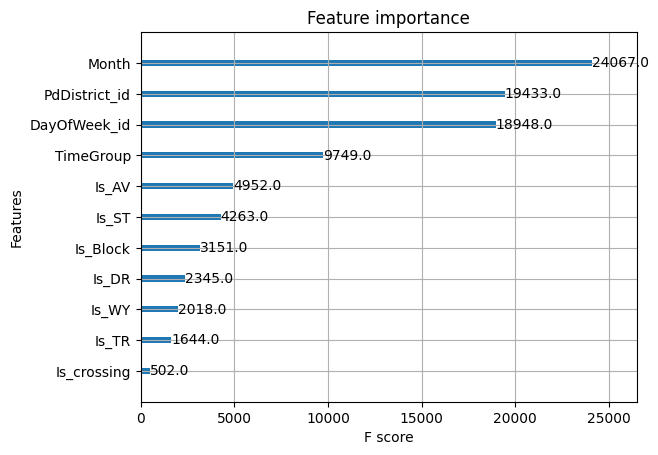

In [76]:
xgb.plot_importance(bst)

In [79]:
model2 = XGBClassifier()
model2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [83]:
y_pred2 = model2.predict(X_val)

In [84]:
accuracy_score(y_pred2, y_val)

0.2433126274095167

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

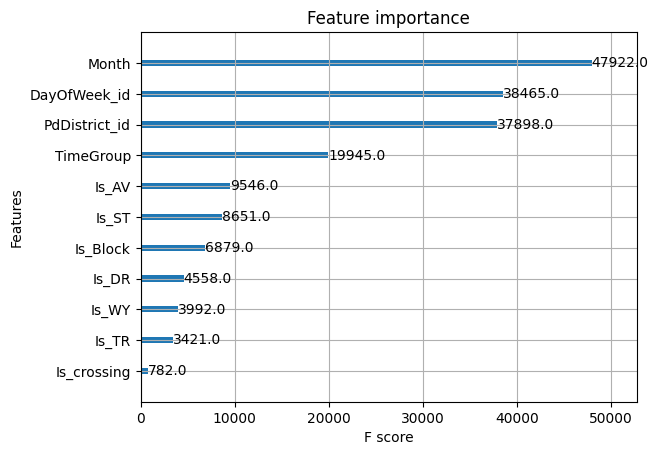

In [85]:
xgb.plot_importance(model2)